In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [2]:
df = quandl.get('WIKI/GOOGL')

df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
df.shape

(3424, 12)

In [4]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [6]:
forecast_col = 'Adj. Close'

df.fillna(-9999, inplace=True)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [7]:
forecast_out = int(math.ceil(0.1*len(df)))
forecast_out

343

In [8]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [9]:
df.tail(forecast_out + 2)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2016-11-09,805.59,0.759692,0.468927,3098510.0,1054.09
2016-11-10,780.29,3.815248,-3.667901,5909609.0,1006.94
2016-11-11,771.75,0.717849,-0.651382,3592641.0,NaN
2016-11-14,753.22,2.464088,-2.402301,3688274.0,NaN
2016-11-15,775.16,0.655039,1.265889,2943889.0,NaN
2016-11-16,779.98,0.451294,-0.237900,1798360.0,NaN
2016-11-17,786.16,0.348530,0.467732,1533679.0,NaN
2016-11-18,775.97,1.974303,-1.422818,1806264.0,NaN
2016-11-21,784.80,0.222987,0.861072,1630835.0,NaN


In [10]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X

array([[-1.39187095,  2.33516806,  0.23254018,  4.46712802],
       [-1.37635178, -0.31135438,  4.81828847,  1.8207495 ],
       [-1.37423066,  2.35004252, -0.79917922,  1.26561472],
       ...,
       [ 2.39583323,  2.51713951, -1.55184968, -0.65539548],
       [ 2.50268682, -0.50488861,  0.23733959, -0.55124957],
       [ 2.31974758,  4.10537475, -3.54051775, -0.59144015]])

In [11]:
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

y = np.array(df['label'])

y

array([ 214.00561483,  210.7254894 ,  208.07229925, ..., 1026.55      ,
       1054.09      , 1006.94      ])

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [13]:
### No need to run all above cells if youve already saved your pickle
# clf = LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)

# Saving pickle
# with open('linearRegression.pickle', 'wb') as f:
#    pickle.dump(clf, f)

In [14]:
# Retrieving pickle
pickle_in = open('linearRegression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [15]:
accuracy = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)

In [16]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set: 
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+ [i]

[]

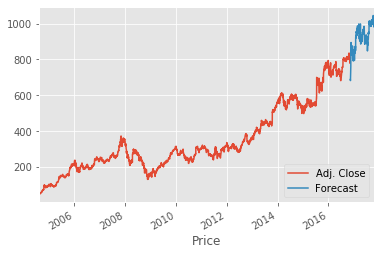

In [17]:

df['Adj. Close'].plot()

df['Forecast'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.xlabel('Price')
plt.plot()
